Welcome to the solutions to Week 1, Computation Problem Set 1A! 
Here we complete the exercises in the Numerical Differentiation, Numerical Integration, and 
Newton's Method Labs.

# Numerical Differentiation:

In [1]:
from matplotlib import pyplot as plt
import sympy as sy
from sympy import lambdify
import numpy as np

# Problem 1:

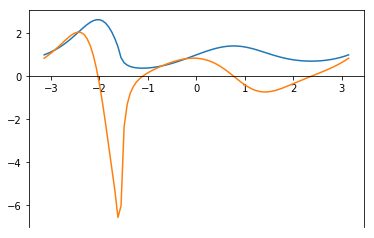

In [2]:
def problem_one():
    x = sy.symbols('x')
    g = (sy.sin(x)+1) ** (sy.sin(sy.cos(x)))
    f = sy.diff(g)
    t = lambdify(x, f, 'numpy')
    
    return t
space = np.linspace(-np.pi, np.pi, 100)
t = problem_one()
ax = plt.plot(space, (np.sin(space)+1) ** (np.sin(np.cos(space))))
plt.plot(space, t(space))
ax2 = plt.gca()
ax2.spines["bottom"].set_position("zero")
plt.show()

# Problem 2:

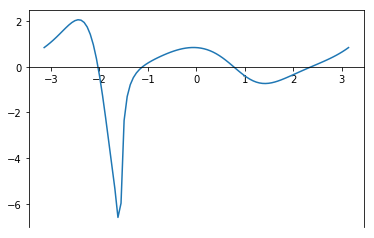

In [3]:
x = np.linspace(-np.pi, np.pi, 100)
f = lambda t : (np.sin(t)+1) ** (np.sin(np.cos(t)))
def forward_o1(f, arr, h):
    diffs = np.zeros(len(arr))
    for i in range(len(arr)):
        diffs[i] = (f(arr[i] + h) - f(arr[i]))/h
    return diffs
ax = plt.plot(x, forward_o1(f,x, .001))
ax2 = plt.gca()
ax2.spines["bottom"].set_position("zero")

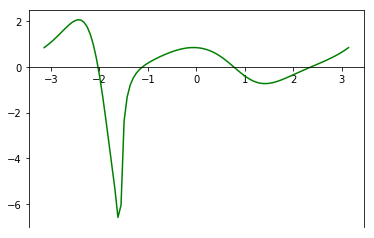

In [4]:
def forward_o2(f, arr, h):
    diffs = np.zeros(len(arr))
    for i in range(len(arr)):
        diffs[i] = (-3*f(arr[i]) + 4*f(arr[i]+h) -f(arr[i]+2*h))/(2*h)
    return diffs
ax = plt.plot(x, forward_o2(f,x, .001), 'g')

ax2 = plt.gca()
ax2.spines["bottom"].set_position("zero")

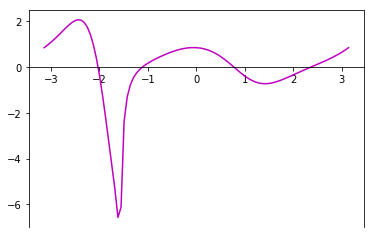

In [5]:
def backward_o1(f, arr, h):
    diffs = np.zeros(len(arr))
    for i in range(len(arr)):
        diffs[i] = (f(arr[i]) - f(arr[i] - h))/h
    return diffs
ax = plt.plot(x, backward_o1(f,x, .001), 'm')

ax2 = plt.gca()
ax2.spines["bottom"].set_position("zero")

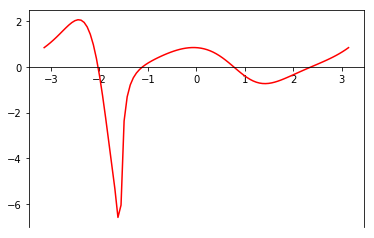

In [6]:
def backward_o2(f, arr, h):
    diffs = np.zeros(len(arr))
    for i in range(len(arr)):
        diffs[i] = (3*f(arr[i]) - 4*f(arr[i] - h) +f(arr[i]-2*h))/(2*h)
    return diffs
ax = plt.plot(x, backward_o2(f,x, .001), 'r')

ax2 = plt.gca()
ax2.spines["bottom"].set_position("zero")

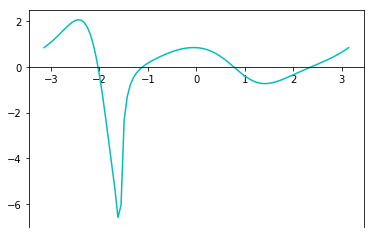

In [7]:
def center_o2(f, arr, h):
    diffs = np.zeros(len(arr))
    for i in range(len(arr)):
        diffs[i] = (f(arr[i]+ h) - f(arr[i] - h))/(2*h)
    return diffs
ax = plt.plot(x, center_o2(f,x, .001), 'c')

ax2 = plt.gca()
ax2.spines["bottom"].set_position("zero")

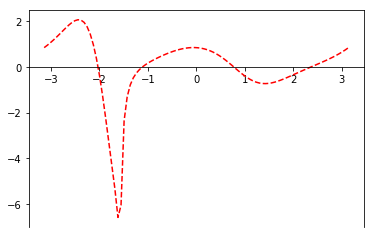

In [8]:
def center_o4(f, arr, h):
    diffs = np.zeros(len(arr))
    for i in range(len(arr)):
        diffs[i] = (f(arr[i]-2*h) - 8*f(arr[i]-h) + 8*f(arr[i]+h) - f(arr[i]+2*h))/(12*h)
    return diffs
ax = plt.plot(x, center_o4(f,x, .001), 'r--')

ax2 = plt.gca()
ax2.spines["bottom"].set_position("zero")

# Problem 3:

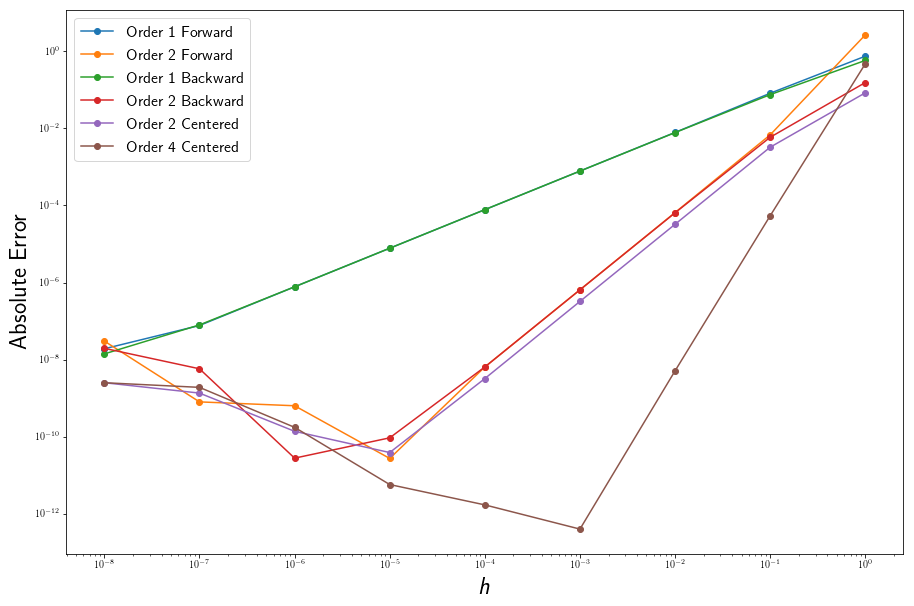

In [9]:
def problem_three(x_0):
    f = lambda x : (np.sin(x)+1) ** (np.sin(np.cos(x)))
    g = problem_one()
    exact = g(x_0)
    #h_array = [1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]
    h_array = np.logspace(-8, 0 , 9)
    o_1_f_err = np.zeros(9)
    o_2_f_err = np.zeros(9)
    o_1_b_err = np.zeros(9)
    o_2_b_err = np.zeros(9)
    o_2_c_err = np.zeros(9)
    o_4_c_err = np.zeros(9)
    count = 0
    for h in h_array:
        o_1_f_err[count] = np.abs(forward_o1(f, [x_0], h) - exact)
        o_2_f_err[count]= np.abs(forward_o2(f, [x_0], h) - exact)
        o_1_b_err[count]= np.abs(backward_o1(f, [x_0], h) - exact)
        o_2_b_err[count]= np.abs(backward_o2(f, [x_0], h) - exact)
        o_2_c_err[count]= np.abs(center_o2(f, [x_0], h) - exact)
        o_4_c_err[count]= np.abs(center_o4(f, [x_0], h) - exact)
        count += 1
    #sp = np.logspace(-8, 0, 9)
    plt.figure(figsize = [15, 10])
    plt.rc('text', usetex=True)
    plt.loglog(h_array, o_1_f_err, label="Order 1 Forward", marker='o')
    plt.loglog(h_array, o_2_f_err, label="Order 2 Forward", marker='o')
    plt.loglog(h_array, o_1_b_err, label="Order 1 Backward",marker='o')
    plt.loglog(h_array, o_2_b_err, label="Order 2 Backward",marker='o')
    plt.loglog(h_array, o_2_c_err, label="Order 2 Centered",marker='o')
    plt.loglog(h_array, o_4_c_err,label="Order 4 Centered",marker='o' )
    plt.xlabel(r'\textit{h}', fontsize = 24)
    plt.ylabel("Absolute Error", fontsize=24)
    plt.legend(loc="upper left", prop={'size': 16})
    
problem_three(np.pi)

# Problem 5:

In [10]:
def jacobian_centered_o2(f, x_0, h):
    jacobian = np.zeros((len((f(x_0))), len(x_0)))
    for i in range(len(f(x_0))):
            jacobian[:,i] = (f(x_0 + h * np.eye(len(x_0))[i]) - f(x_0 - h * np.eye(len(x_0))[i]))/(2*h)
    return jacobian

In [11]:
f = lambda x: np.array([x[0] ** 2, x[0] ** 3 - x[1]])

jac = jacobian_centered_o2(f, [7,2], .001)

print(jac)

[[ 14.         0.      ]
 [147.000001  -1.      ]]


# Problem 6:

In [12]:
from autograd import numpy as anp
from autograd import grad
from autograd import elementwise_grad

/anaconda3/lib/python3.6/site-packages/autograd/tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")


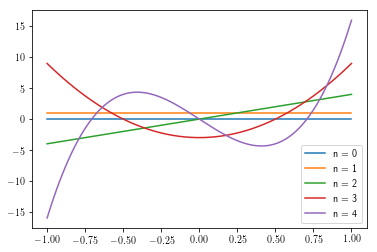

In [13]:
def chebyshev(x, n):
    if n==0:
        return anp.ones_like(len(x))
    if n==1:
        return x
    return 2 * x * chebyshev(x, n-1) - chebyshev(x, n-2)

dcheby = elementwise_grad(chebyshev)
sp = np.linspace(-1,1, 200)
for n in range(5):
    plt.plot(sp, dcheby(sp, n), label="n = {}".format(n))
plt.legend()
plt.show()

# Newton's Method:

# Problem 1:

In [14]:
import numpy as np
import scipy.optimize 
def newtons_meth(f, x_0, f_prime, tol=1e-5, maxiters=15, alpha =1):
    x_update = x_0
    conv = False
    for i in range(maxiters):
        x_temp = x_update
        x_update -= alpha*f(x_update)/f_prime(x_update)
        if np.abs(x_temp - x_update) < tol:
            conv = True
            break
    if conv:
        print("Newton's method converged")
    else: print("Maximum number of iterations completed.")
    return x_update
f = lambda x : np.exp(x) - 2
f_prime = lambda x: np.exp(x)
g = lambda x: x **4 -3
g_prime = lambda x: 4*x**3
x_0 = 1
root_approx_f = newtons_meth(f, x_0, f_prime, tol=1e-8, maxiters=5)
root_approx_g = newtons_meth(g, x_0, g_prime, tol=1e-8, maxiters=7)
print(root_approx_f)
print(root_approx_g)
print(scipy.optimize.newton(f, x_0, f_prime, tol=1e-8))
print(scipy.optimize.newton(g, x_0, g_prime, tol=1e-8))

print("not too shabby")

Newton's method converged
Newton's method converged
0.6931471805599453
1.3160740129524924
0.6931471805599453
1.3160740129524924
not too shabby


# Problem 3:

See modified function for backtracking addition!

In [15]:
f = lambda x: np.sign(x) * np.power(np.abs(x), 1./3)
f_prime = lambda x: (1/3) * np.power(np.abs(x), -2/3)
x_0 = .01
root_approx_f = newtons_meth(f, x_0, f_prime, tol=1e-8, maxiters=10, alpha=.4)
print(root_approx_f)

Newton's method converged
1.0240000000000486e-09


# Problem 4:

In [16]:
import matplotlib.pyplot as plt
def newtons_meth_alphafind(f, x_0, f_prime, tol=1e-8, maxiters=100):
    alpha_vals = np.linspace(0.001, 1, 1000)
    alpha_iters = np.zeros(1000)
    x_update = x_0
    for i in range(len(alpha_vals)):
        conv = False
        num_iters = 0
        x_update = x_0
        for j in range(maxiters):
            x_temp = x_update
            x_update -= alpha_vals[i]*f(x_update)/f_prime(x_update)
            if np.abs(x_temp - x_update) < tol:
                num_iters = j
                alpha_iters[i] = num_iters
                conv = True
                break

        if not conv:
            alpha_iters[i] = 100

        
    plt.plot(alpha_vals, alpha_iters)
    min_ind = np.argmin(alpha_iters)
    
    return alpha_vals[min_ind]

0.333

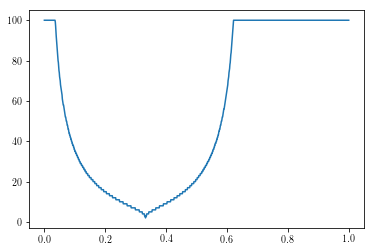

In [17]:
newtons_meth_alphafind(f, x_0, f_prime)

# Problem 7:

We do this for the fifth roots of unity because, well, they're kind of awesome


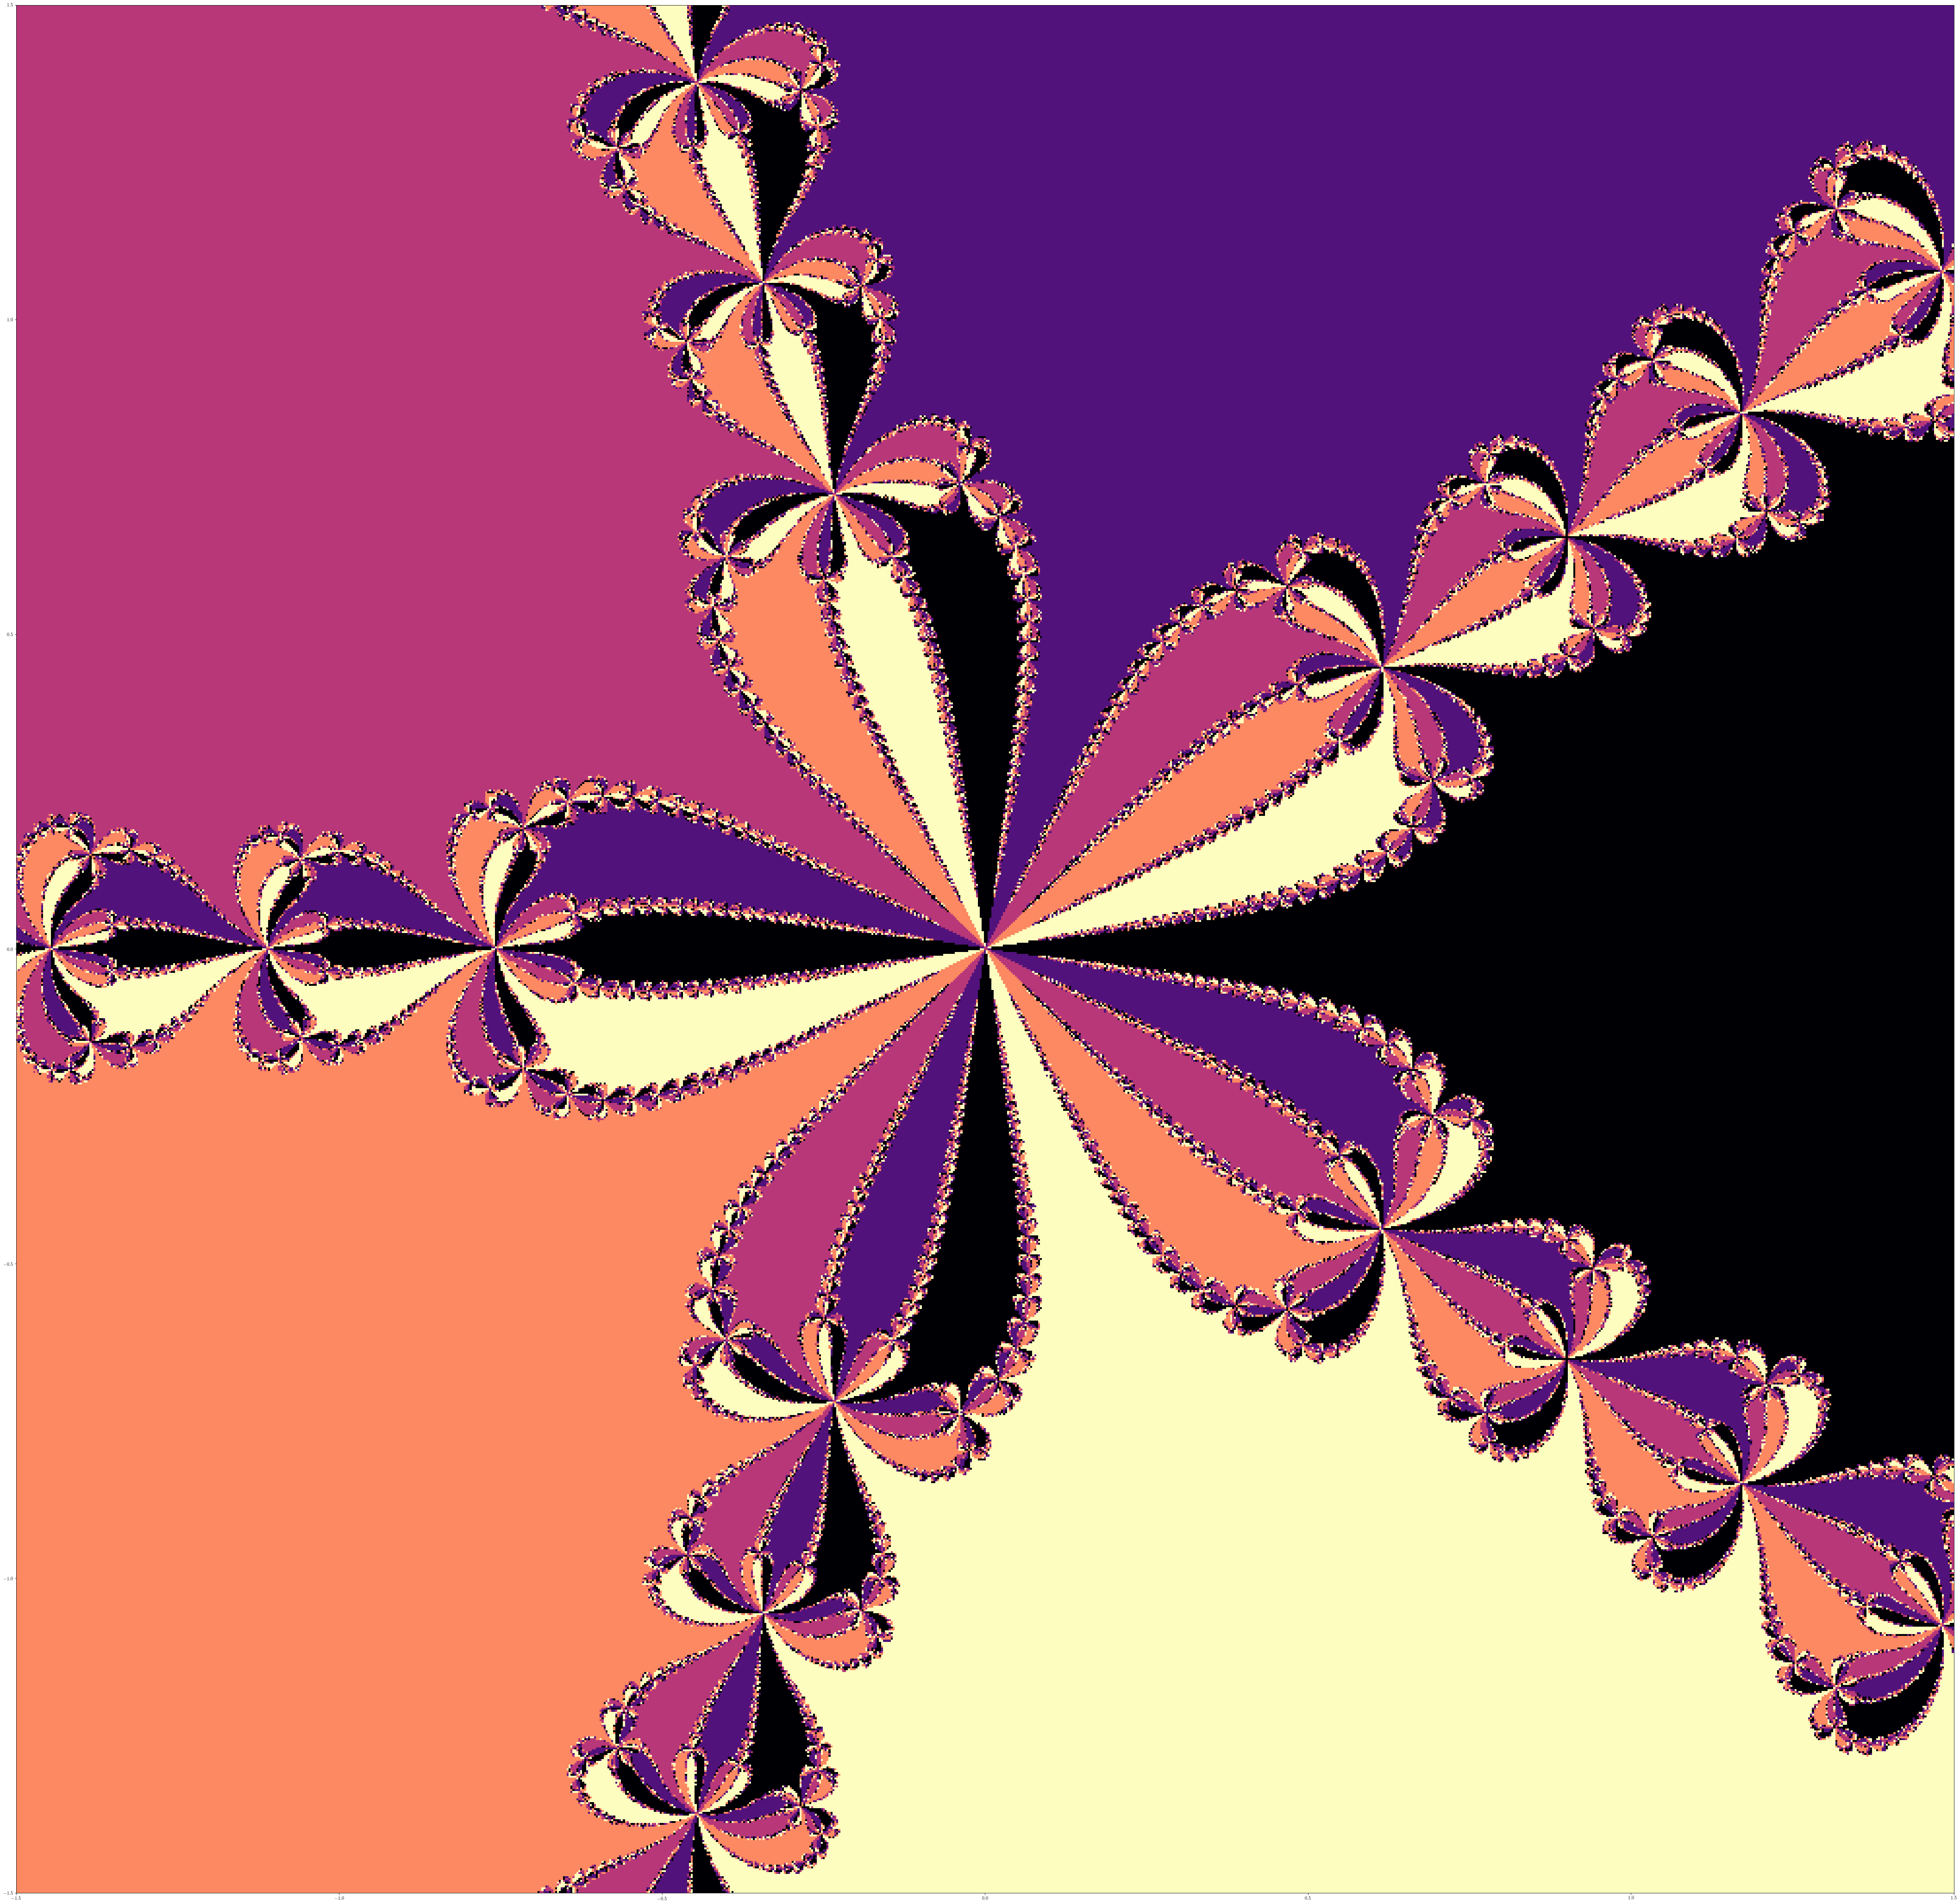

In [18]:
def newtons_meth_cheap(f, x_0, f_prime, maxiters=15):
    x_update = x_0
    for i in range(maxiters):
        x_temp = x_update
        x_update -= f(x_update)/f_prime(x_update)
    return x_update
def complex_newton(f, f_prime, zeros, bounds, res, iters):
    x_real = np.linspace(bounds[0], bounds[1], res)
    x_imag = np.linspace(bounds[2], bounds[3], res)
    X_real, X_imag = np.meshgrid(x_real, x_imag)
    X_0 = X_real + 1j*X_imag
    X_k = np.zeros(X_0.shape, dtype=complex)
    Y = np.zeros(X_0.shape)
    for index, elem in np.ndenumerate(X_0):
        c_num = newtons_meth_cheap(f, elem, f_prime,  maxiters=iters)
        X_k[index] = c_num
        Y[index] = np.argmin(np.abs(X_k[index] - zeros))
    plt.figure(figsize=(75,75))
    plt.pcolormesh(X_real, X_imag, Y, cmap="magma")
#f = lambda x: x**3. - 1
# f_prime = lambda x: 3* x **2
print("We do this for the fifth roots of unity because, well, they're kind of awesome")
f = lambda x: x**5 - 1
f_prime = lambda x: 5*x**4 
# zeros = np.array([1, -.5+1j*(np.sqrt(3)/2), -.5-1j*(np.sqrt(3)/2)])
zeros = np.array([1, np.exp(1j*2*1*np.pi/5),np.exp(1j*2*2*np.pi/5),np.exp(1j*2*3*np.pi/5),np.exp(1j*2*4*np.pi/5)])

complex_newton(f, f_prime, zeros,[-1.5, 1.5, -1.5, 1.5] , 1000, 40)


# Numerical Integration:

# Exercise 2.1

In [19]:
import numpy as np
import matplotlib.pyplot as plt
def integrator(g, a, b, N, method):
    if method == 'midpoint':
        integral = 0
        for i in range(0, N):
            x_i = a + ((2*i + 1)*(b-a))/(2*N)
            integral += ((b-a)/N) * g(x_i)
        return integral
    elif method == 'trapezoid':
        integral = 0
        integral += g(a)
        for i in range(1, N):
            x_i = a + i*(b-a)/N
            integral += 2*g(x_i)
        integral += g(b)
        integral *= (b-a)/(2*N)
        return integral
    elif method == 'Simpsons':
        integral = 0
        integral += g(a)
        for i in range(1, 2*N):
            x_i = a + i*(b-a)/(2*N)
            if i % 2 == 0:
                integral += 2*g(x_i)
            else: integral += 4*g(x_i)
        integral += g(b)
        integral *= (b-a)/(6*N)
        return integral
f = lambda g: .1*g**4 - 1.5*g**3+.53*g**2 + 2*g + 1
print("Midpoint Method Difference (N= 100): {}".format(np.abs(integrator(f, -10, 10, 100, 'midpoint') - 4373.33333333)))
print("Trapezoid Method Difference (N= 100): {}".format(np.abs(integrator(f, -10, 10, 100, 'trapezoid')- 4373.33333333)))
print("Simpsons Method Difference (N=100): {}".format(np.abs(integrator(f, -10, 10, 100, 'Simpsons')- 4373.33333333)))

Midpoint Method Difference (N= 100): 1.3685733300026186
Trapezoid Method Difference (N= 100): 2.7372266700012915
Simpsons Method Difference (N=100): 2.6670000806916505e-05


# Exercise 2.2

[1.59108590e-04 2.39602174e-03 2.01950016e-02 9.23195383e-02
 2.29508588e-01 3.10843483e-01 2.29508588e-01 9.23195383e-02
 2.01950016e-02 2.39602174e-03 1.59108590e-04]


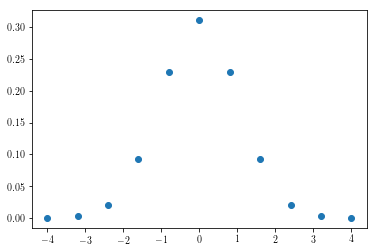

In [20]:
import scipy.stats
def norm_approx(mu, sigma, N, k):
    nodes = np.linspace(mu-k*sigma, mu+k*sigma, N)
    F = scipy.stats.norm.cdf
    #nodes = np.zeros(N)
    weights = np.zeros(N)
    #nodes[0] = first_node
    weights[0] = F((nodes[0]+nodes[1])/2 , loc=mu, scale=sigma)
    for i in range(1, N-1):
        weights[i] = F((nodes[i+1] + nodes[i])/2, loc=mu, scale=sigma) - F((nodes[i] + nodes[i-1])/2, loc=mu, scale=sigma)
        #weights[i] =F(nodes[i]) - F(nodes[i-1])
    weights[-1] = 1 - F((nodes[-1] + nodes[-2])/2, loc=mu, scale=sigma)
    return nodes, weights
nodes, weights = norm_approx(0, 1, 11, 4)
approx = 0
for i in range(len(nodes)):
    approx += weights[i] * scipy.stats.norm.pdf(nodes[i])
print(weights)

plt.plot(nodes, weights,'o')


# Exercise 2.3

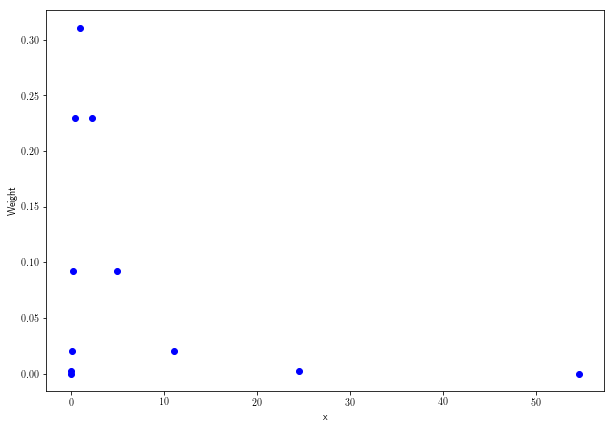

In [21]:
def lognormal_approx(mu, sigma, N, k):
    nodes, weights = norm_approx(mu,sigma, N,k)
    
    nodes = np.exp(nodes)
    return nodes, weights
A_nodes, weights= lognormal_approx(0, 1, 11, 4)

fig = plt.figure(figsize=(10,7))
plt.plot(A_nodes, weights, 'bo')
plt.xlabel('x')
plt.ylabel('Weight')
plt.show()

# Exercise 2.4

In [23]:
mu = 10.5
sigma = .8 
A_nodes, weights = lognormal_approx(mu, sigma, 100, 4)
#approx = (A_nodes * weights).sum()

avg_income = np.average(A_nodes, weights=weights)
print(avg_income)
tru = np.exp(mu + (sigma**2)/2)
print(tru)
print(np.abs(avg_income- tru))
print("it's not 10 to the negative eight, but it ain't too shabby")

50013.67483078613
50011.087008521754
2.5878222643732443
it's not 10 to the negative eight, but it ain't too shabby


# Exercise 3.1

In [24]:
import scipy.optimize
f = lambda g: .1*g**4 - 1.5*g**3+.53*g**2 + 2*g + 1
x = lambda x: x
def gaussian_quad(a, b, N):
    weights_and_nodes = np.zeros(2*N)
    eqns = np.zeros(2*N)
    def system(w):
        out = np.zeros(2*N)
        for i in range(0,2*N):
            fam_int = (b**(i+1))/(i+1) - (a**(i+1)/(i+1))
            out[i] = np.sum(np.array([np.sum(w[j]*(w[N + j]**i)) for j in range(0,N)])) - fam_int
        return out
    results = scipy.optimize.root(system, [.888, .5555,.5555,0,-.77459,.77459])
    return results.x
w = gaussian_quad(-10,10, 3)
print(np.sum([w[i]*f(w[3+i]) for i in range(0,3)]))
print("Now that's a spicy meatball")

4373.333330498426
Now that's a spicy meatball


# Exercise 3.2

In [25]:
import scipy.integrate
f = lambda g: .1*g**4 - 1.5*g**3+.53*g**2 + 2*g + 1
scipy.integrate.quad(f, -10, 10)

(4373.333333333334, 8.109531705284936e-11)

# Exercise 4.1

In [26]:
import random
def g(x):

    if x[0]**2 + x[1] **2 <= 1:
        return 1
    else: return 0
def monte_carlo_area(g, dom, N):
    random.seed(25)
    tot_sum = 0
    for i in range(0, N):
        tot_sum += g([random.uniform(dom[0],dom[1]), random.uniform(dom[0],dom[1])])
    return 4* tot_sum/N
monte_carlo_area(g, [-1,1], 941000)


3.1415940488841656